In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('all_seasons.csv', index_col=0)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11145 entries, 0 to 11144
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            9461 non-null   object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           11145 no

In [4]:
df.describe

<bound method NDFrame.describe of               player_name team_abbreviation   age  player_height   
0           Dennis Rodman               CHI  36.0         198.12  \
1       Dwayne Schintzius               LAC  28.0         215.90   
2            Earl Cureton               TOR  39.0         205.74   
3             Ed O'Bannon               DAL  24.0         203.20   
4             Ed Pinckney               MIA  34.0         205.74   
...                   ...               ...   ...            ...   
11140         Maxi Kleber               DAL  28.0         208.28   
11141  Melvin Frazier Jr.               ORL  23.0         195.58   
11142      Meyers Leonard               MIA  28.0         213.36   
11143        Norvel Pelle               PHI  27.0         208.28   
11144         Matt Thomas               TOR  25.0         193.04   

       player_weight                      college  country draft_year   
0          99.790240  Southeastern Oklahoma State      USA       1986  \
1  

In [5]:
misval = df.isnull().sum()
misval

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1684
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [6]:
data = df.drop(['team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season'], axis = 1) 

In [7]:
data.head()

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Dennis Rodman,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,Dwayne Schintzius,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,Earl Cureton,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,Ed O'Bannon,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,Ed Pinckney,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11145 entries, 0 to 11144
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    11145 non-null  object 
 1   age            11145 non-null  float64
 2   player_height  11145 non-null  float64
 3   player_weight  11145 non-null  float64
 4   gp             11145 non-null  int64  
 5   pts            11145 non-null  float64
 6   reb            11145 non-null  float64
 7   ast            11145 non-null  float64
 8   net_rating     11145 non-null  float64
 9   oreb_pct       11145 non-null  float64
 10  dreb_pct       11145 non-null  float64
 11  usg_pct        11145 non-null  float64
 12  ts_pct         11145 non-null  float64
 13  ast_pct        11145 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
data1 = data.drop(['player_name'], axis = 1) 

In [10]:
data1.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


In [11]:
X = data1.values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 2.03300598, -0.29299825, -0.06740187, ..., -1.61372772,
        -0.29430552, -0.19026385],
       [ 0.19137211,  1.64159528,  1.37535167, ..., -0.19981447,
        -0.78988296, -0.87438137],
       [ 2.72361868,  0.53611326, -0.42809025, ..., -1.55717119,
        -1.33602954,  0.17810712],
       ...,
       [ 0.19137211,  1.36522477,  1.37535167, ..., -1.23668419,
         1.33402039, -0.57968459],
       [-0.03883212,  0.81248377,  0.32935535, ..., -1.12357113,
         0.13047515, -0.79018229],
       [-0.49924058, -0.84573925, -1.14946702, ..., -0.68997106,
         1.56663837, -0.44286109]])

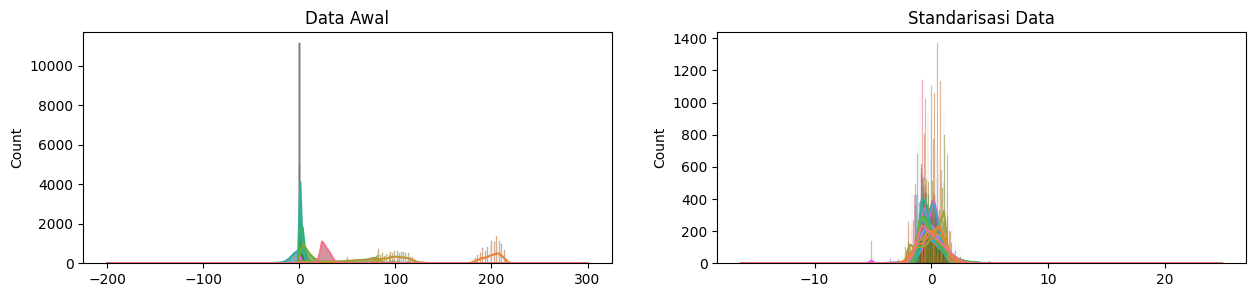

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(X, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Standarisasi Data")
plt.show()

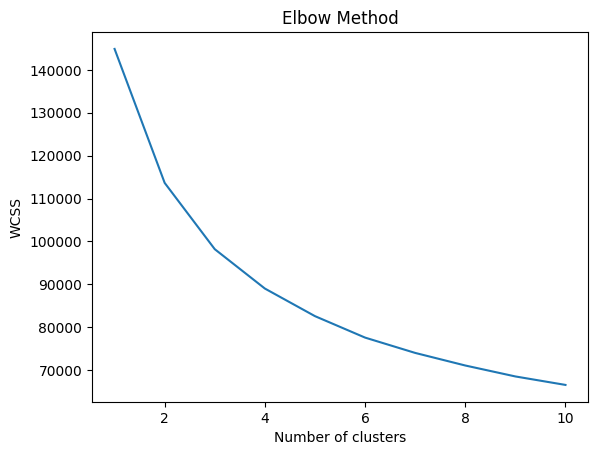

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
X_numerics = df[['age','player_height',	'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]

c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

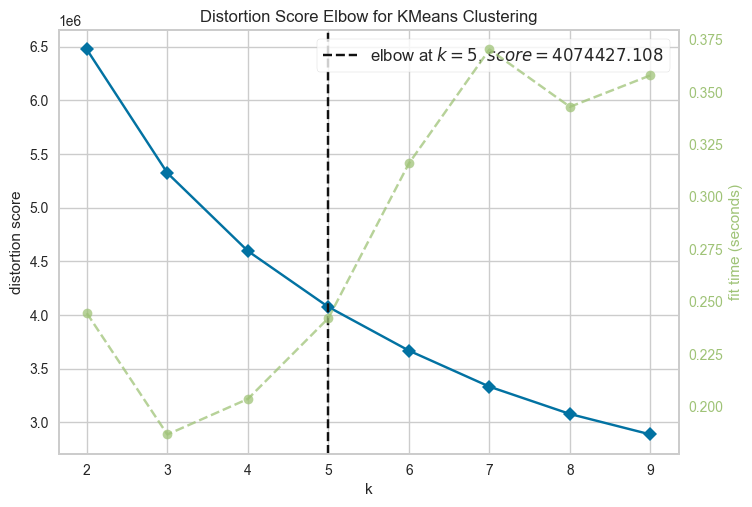

In [15]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

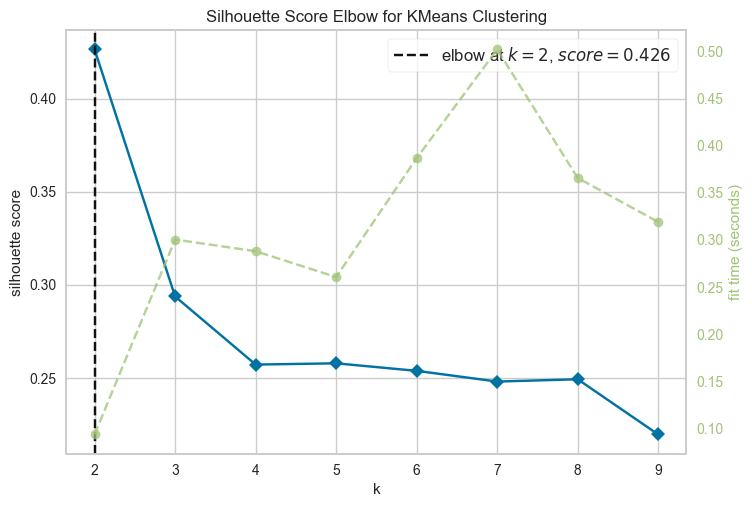

In [16]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [17]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


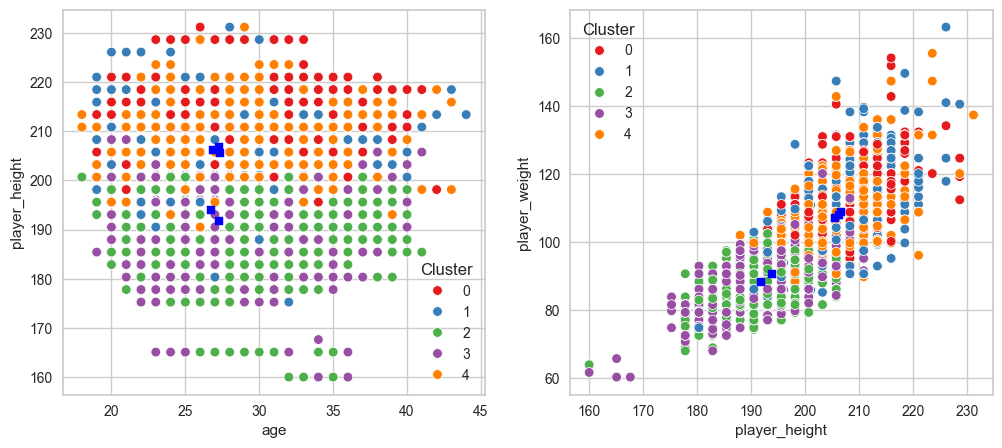

In [18]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

scat_1 = sns.scatterplot(x='age', y='player_height', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='player_height', y='player_weight', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# Assuming KM_5_clusters is your KMeans model
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 1], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")

plt.show()


In [19]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,3144
1,1316
2,2814
3,1604
4,2267


c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


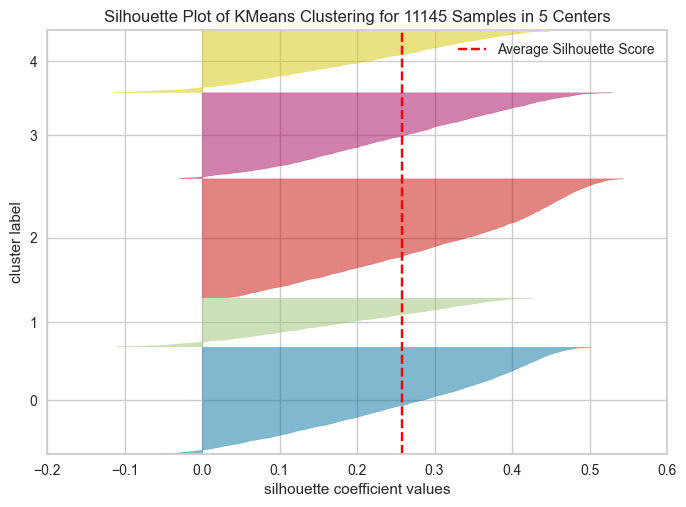

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [21]:
KM5_clustered ['Cluster'] = kmeans.labels_

In [22]:
cluster_summary = KM5_clustered .groupby('Cluster').mean()
cluster_summary.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
Cluster,,,,,,,,,,,,,
0,27.521962,199.799760,97.924948,65.107815,7.278779,2.837479,1.334512,0.126925,0.034370,0.116183,0.162706,0.534224,0.097162
1,24.359649,208.436619,110.198206,26.456140,3.189234,2.391069,0.375120,-5.228708,0.099727,0.179586,0.172987,0.493402,0.060293
2,26.483725,200.476582,98.754114,67.981917,16.358680,4.669892,2.833183,0.379747,0.036215,0.124527,0.234278,0.543526,0.145976
3,27.544056,189.942266,88.426333,68.041958,17.067832,4.073147,6.733706,1.701818,0.025084,0.108062,0.242087,0.538129,0.327365
4,27.994490,187.769325,84.834824,55.712121,7.015014,1.886019,2.887190,-1.811019,0.020181,0.088103,0.185647,0.507333,0.245497
